In [1]:
import os
import sklearn
from skimage import io
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import sys
sys.path.append('../')
from src.data.preprocessing import *
import torch as tc
from src.dataset.dataloader import *


In [2]:
import importlib
import sys
importlib.reload(sys.modules['src.data.preprocessing'])
importlib.reload(sys.modules['src.dataset.dataloader'])
from src.data.preprocessing import *
from src.dataset.dataloader import *

In [3]:
img_dir = "../data/raw"
dataset_raw = CREDO_Dataset(img_dir, False)
dataset_proprop = CREDO_Dataset(img_dir, True)

In [4]:
dataloader_raw = tc.utils.data.DataLoader(dataset_raw, num_workers=2)
dataloader_preprop = tc.utils.data.DataLoader(dataset_proprop)

In [5]:
path = r"../data/raw"
dics = [dic for dic in os.listdir(path)]
dics.pop(0)

files = []

for i in dics:
    for img in os.listdir(os.path.join(path, i)):
        files.append(os.path.join(path, i, img))

for file in files:
    image = io.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    try:
        image = preprop(image)
    except:
        print(file)
        files.append(file)

if len(files) == 0:
    print("Preprop dobry")
else:
    print("Preprop zły :C")


KeyboardInterrupt: 

2
2
2
2


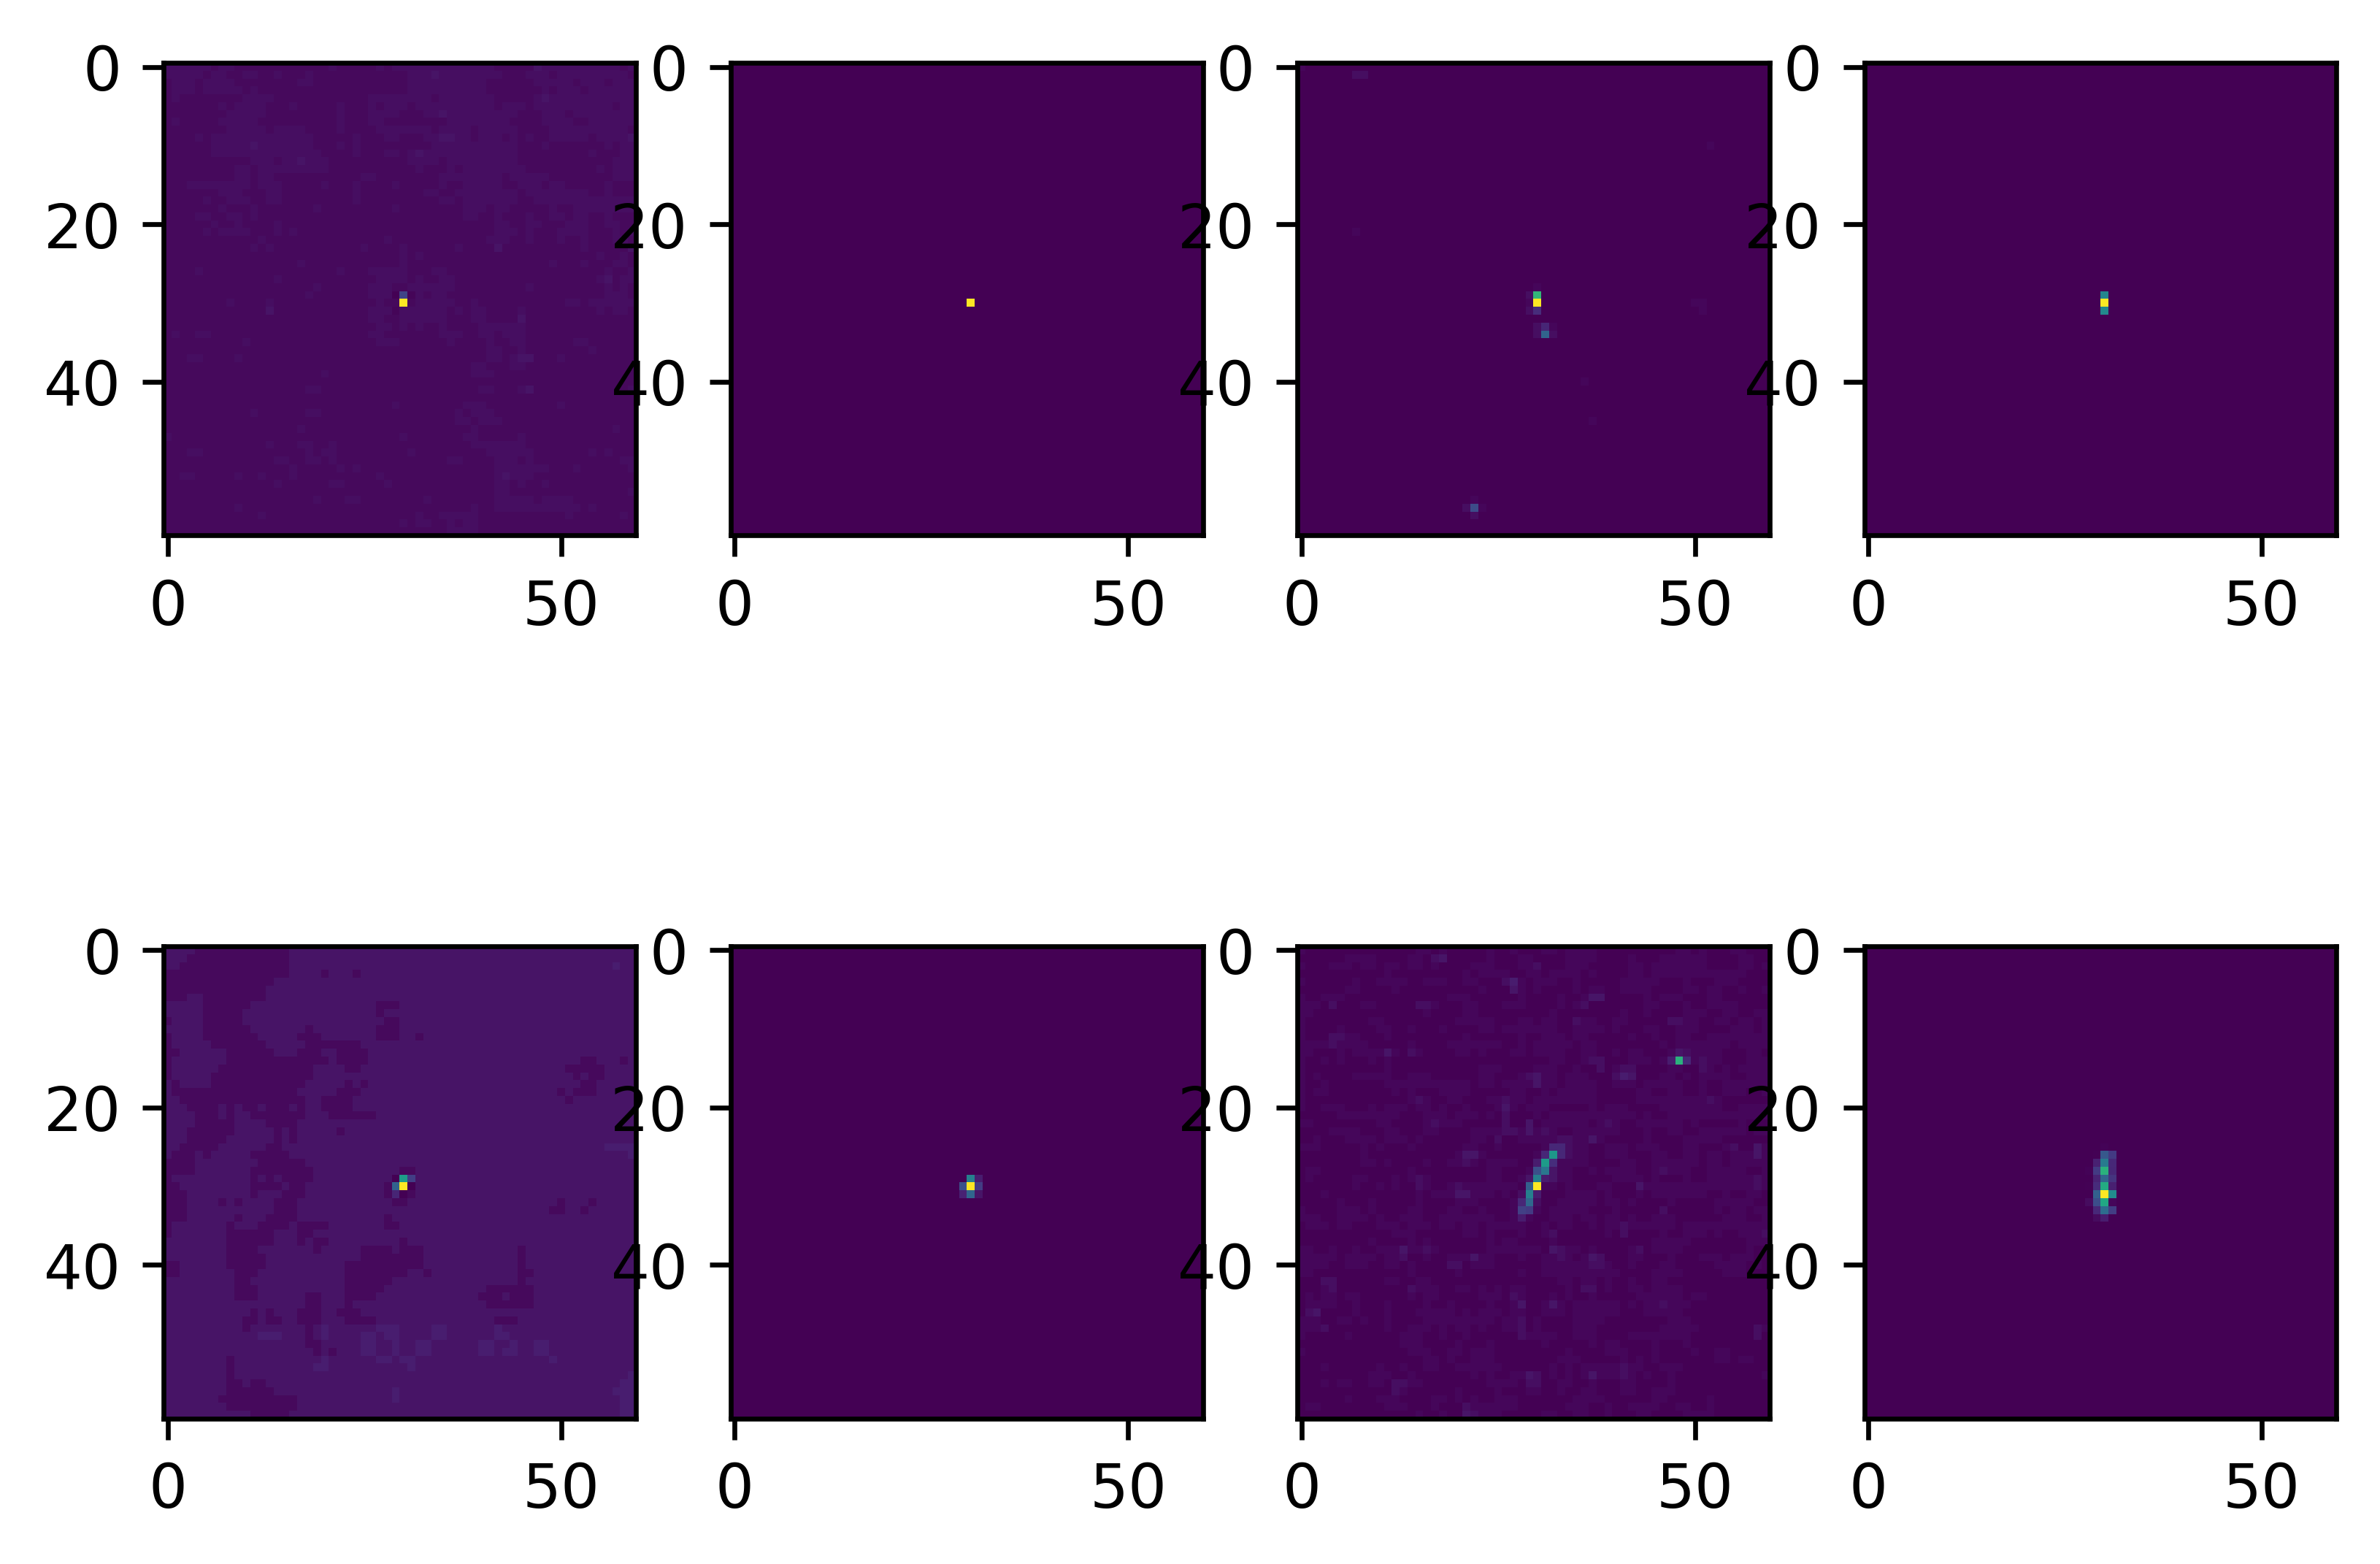

In [ ]:
fig = plt.figure(dpi=600)
#offset = 4*2 <- potężna anomalia!!!
offset = 4*1
for i in range(4):
    img = dataset_raw[i+offset][0]
    plt.subplot(2, 4, 1+i*2)
    plt.imshow(img)
    plt.subplot(2, 4, 2+i*2)
    plt.imshow(dataset_proprop[i+offset][0])


2


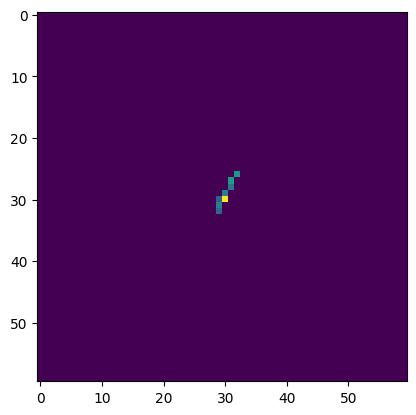

In [ ]:
from skimage.morphology import opening, closing

image = dataset_raw[7][0]
image = norm(image) #Very important!!!
image = image * 255
image = masking(image, threshold_2(image))
#plt.imshow(image)
image = remove_dust(image)
plt.imshow(image)